<a href="https://www.kaggle.com/code/kusumakar/us-natural-resource-eda-ml?scriptVersionId=204558477" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/u-s-natural-resources-revenue-2003-2023/calendar_year_revenue.csv


In [2]:
df=pd.read_csv("/kaggle/input/u-s-natural-resources-revenue-2003-2023/calendar_year_revenue.csv")

In [3]:
df.head()

,Calendar Year,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Revenue Type,Mineral Lease Type,Commodity,Product,Revenue
0,2003,Federal,Onshore,Pennsylvania,Armstrong,42005.0,NaN,Royalties,Oil & Gas,Gas,Unprocessed (Wet) Gas,341.47
1,2003,Federal,Onshore,Louisiana,Natchitoches,22069.0,NaN,Other revenues,Oil & Gas,Oil & gas (pre-production),NaN,331.30
2,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Copper,Copper Concentrate,57929.02
3,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Rents,Hardrock,Hardrock,NaN,-51533.57
4,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Hardrock,Copper Concentrate,14834.41


In [4]:
df.isnull().sum()

Calendar Year             0
Land Class                0
Land Category             0
State                  1955
County                 1955
FIPS Code              1955
Offshore Region       47480
Revenue Type              0
Mineral Lease Type       87
Commodity                 0
Product               22159
Revenue                   0
dtype: int64

In [5]:
df.shape

(48413, 12)

In [6]:
df.drop(columns=['Offshore Region','FIPS Code','Product','Land Category','County','Land Class'],inplace=True)

df=df.dropna()
df.shape

(46458, 6)

In [7]:
df.head()

,Calendar Year,State,Revenue Type,Mineral Lease Type,Commodity,Revenue
0,2003,Pennsylvania,Royalties,Oil & Gas,Gas,341.47
1,2003,Louisiana,Other revenues,Oil & Gas,Oil & gas (pre-production),331.30
2,2003,Missouri,Royalties,Hardrock,Copper,57929.02
3,2003,Missouri,Rents,Hardrock,Hardrock,-51533.57
4,2003,Missouri,Royalties,Hardrock,Hardrock,14834.41


<Axes: >

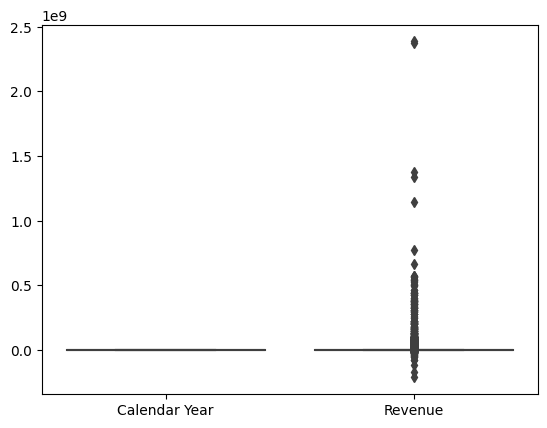

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df)

<Axes: >

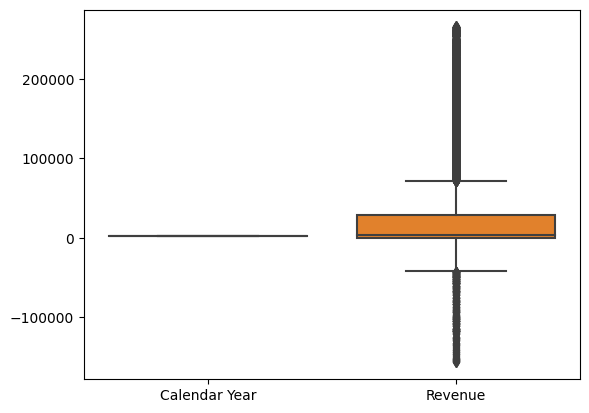

In [9]:
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[(df['Revenue'] >= Q1 - 1.5 * IQR) & (df['Revenue'] <= Q3 + 1.5 * IQR)]

sns.boxplot(df)

In [10]:
df.shape

(37758, 6)

### Overall Revenue State Wise over the Years ( Least Revenue Countries)

<Axes: xlabel='Calendar Year', ylabel='Revenue'>

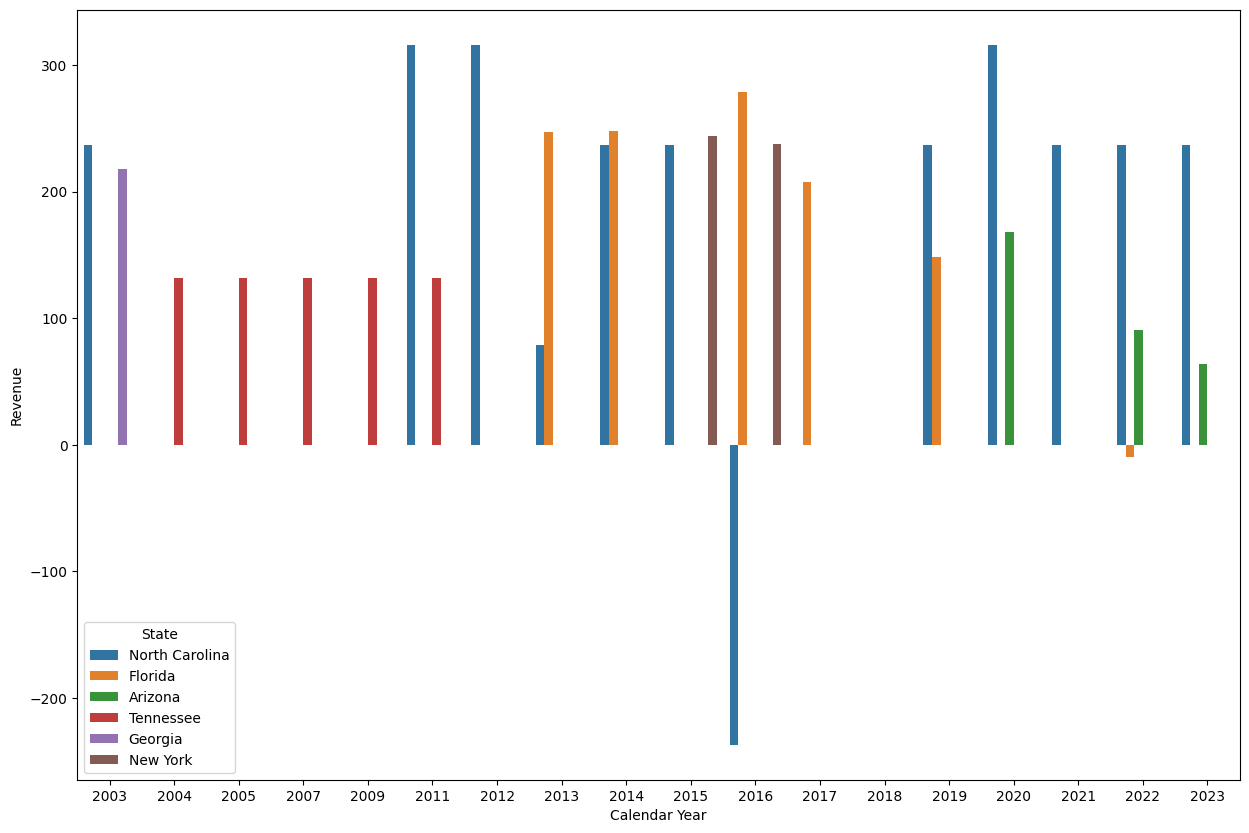

In [11]:

plt.figure(figsize=(15,10))
df1=df.groupby(["State","Calendar Year"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue')
df1['Revenue']=df1['Revenue']
sns.barplot(x='Calendar Year',y='Revenue',hue='State',data=df1.head(30))

### Overall Revenue State Wise over the Years ( Top Revenue Countries)

<Axes: xlabel='Calendar Year', ylabel='Revenue'>

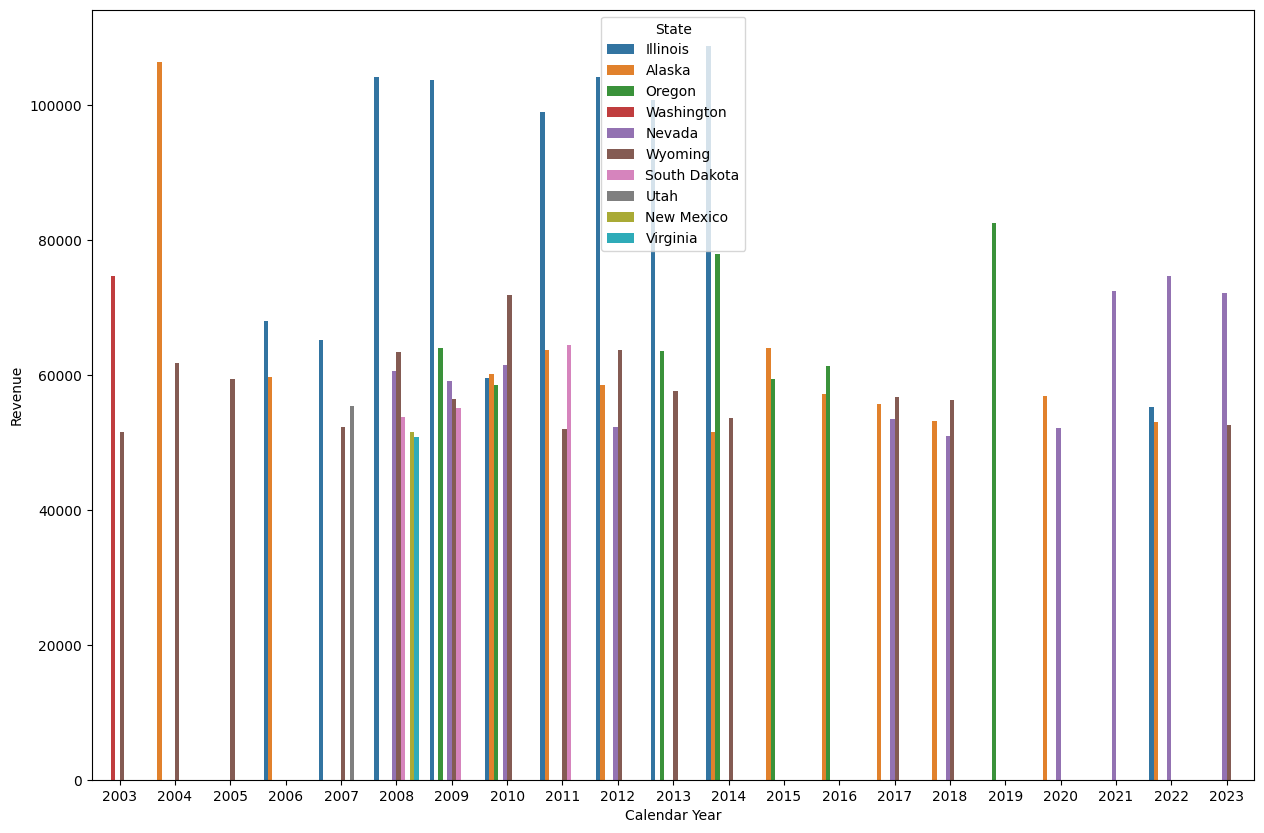

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df1=df.groupby(["State","Calendar Year"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue',ascending=False)
df1['Revenue']=df1['Revenue']
sns.barplot(x='Calendar Year',y='Revenue',hue='State',data=df1.head(60))

### Overall Revenue State Wise over the Years based on Revenue Type ( Least Revenue Countries)

<Axes: xlabel='State', ylabel='Revenue'>

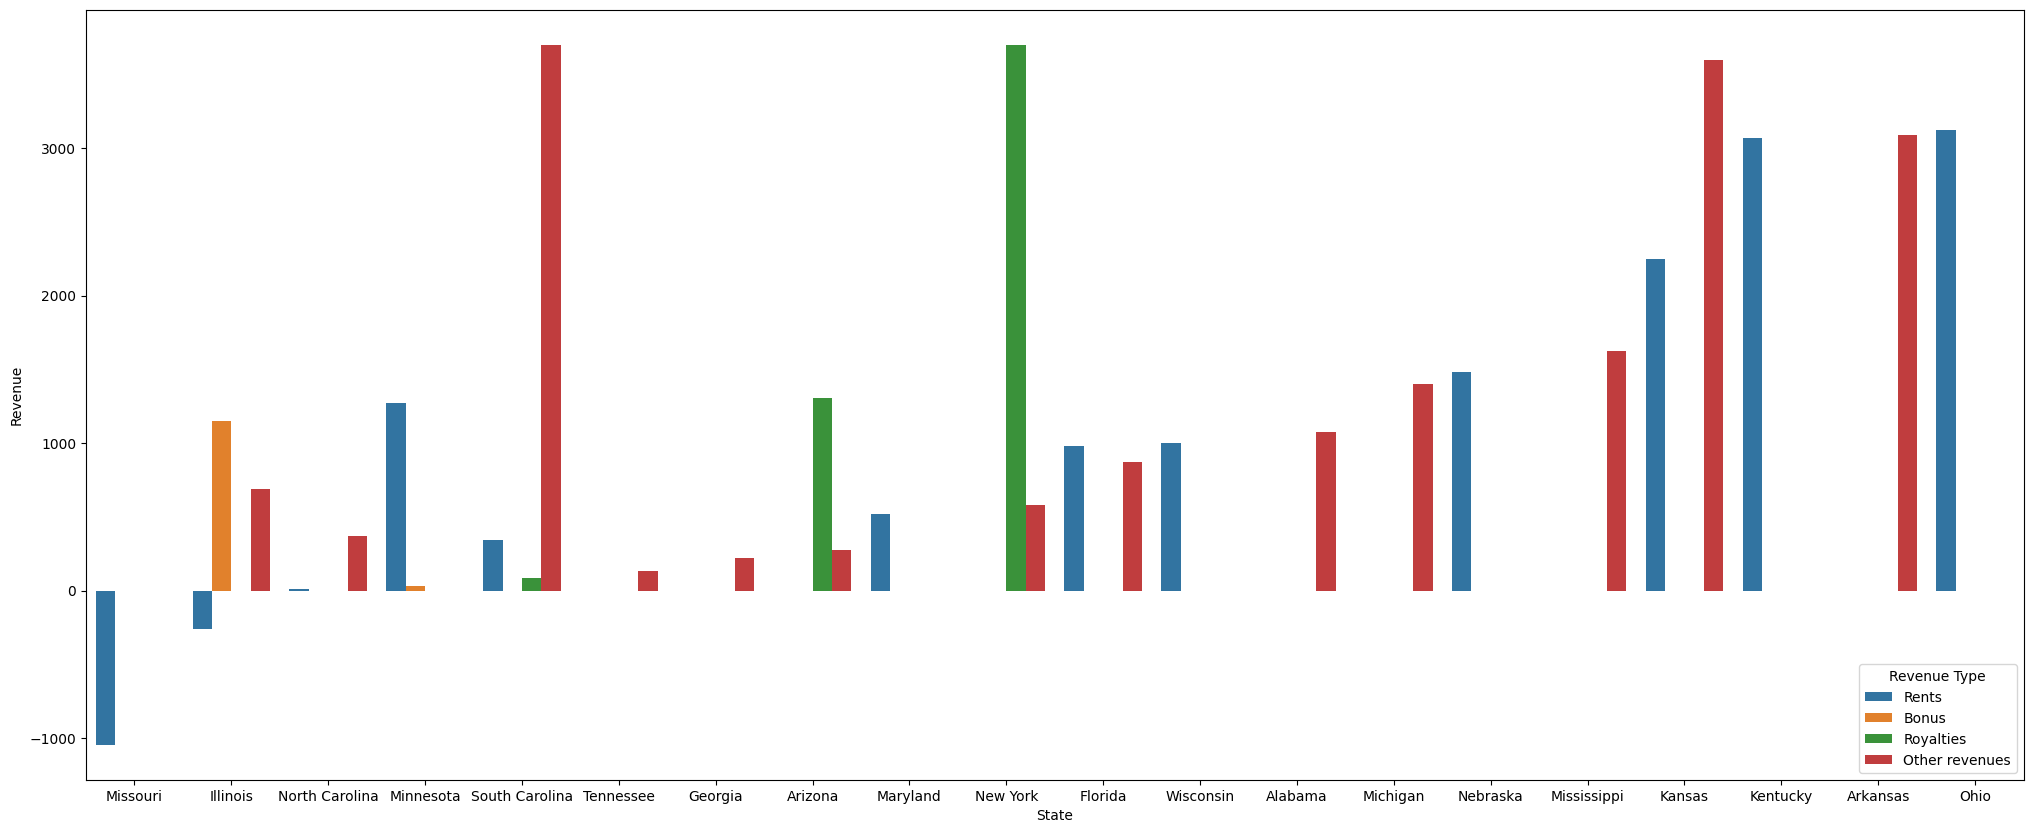

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df1=df.groupby(["State","Revenue Type"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue')
sns.barplot(x='State',y='Revenue',hue='Revenue Type',data=df1.head(30))

### Overall Revenue State Wise over the Years based on Revenue Type ( Top Revenue Countries)

<Axes: xlabel='State', ylabel='Revenue'>

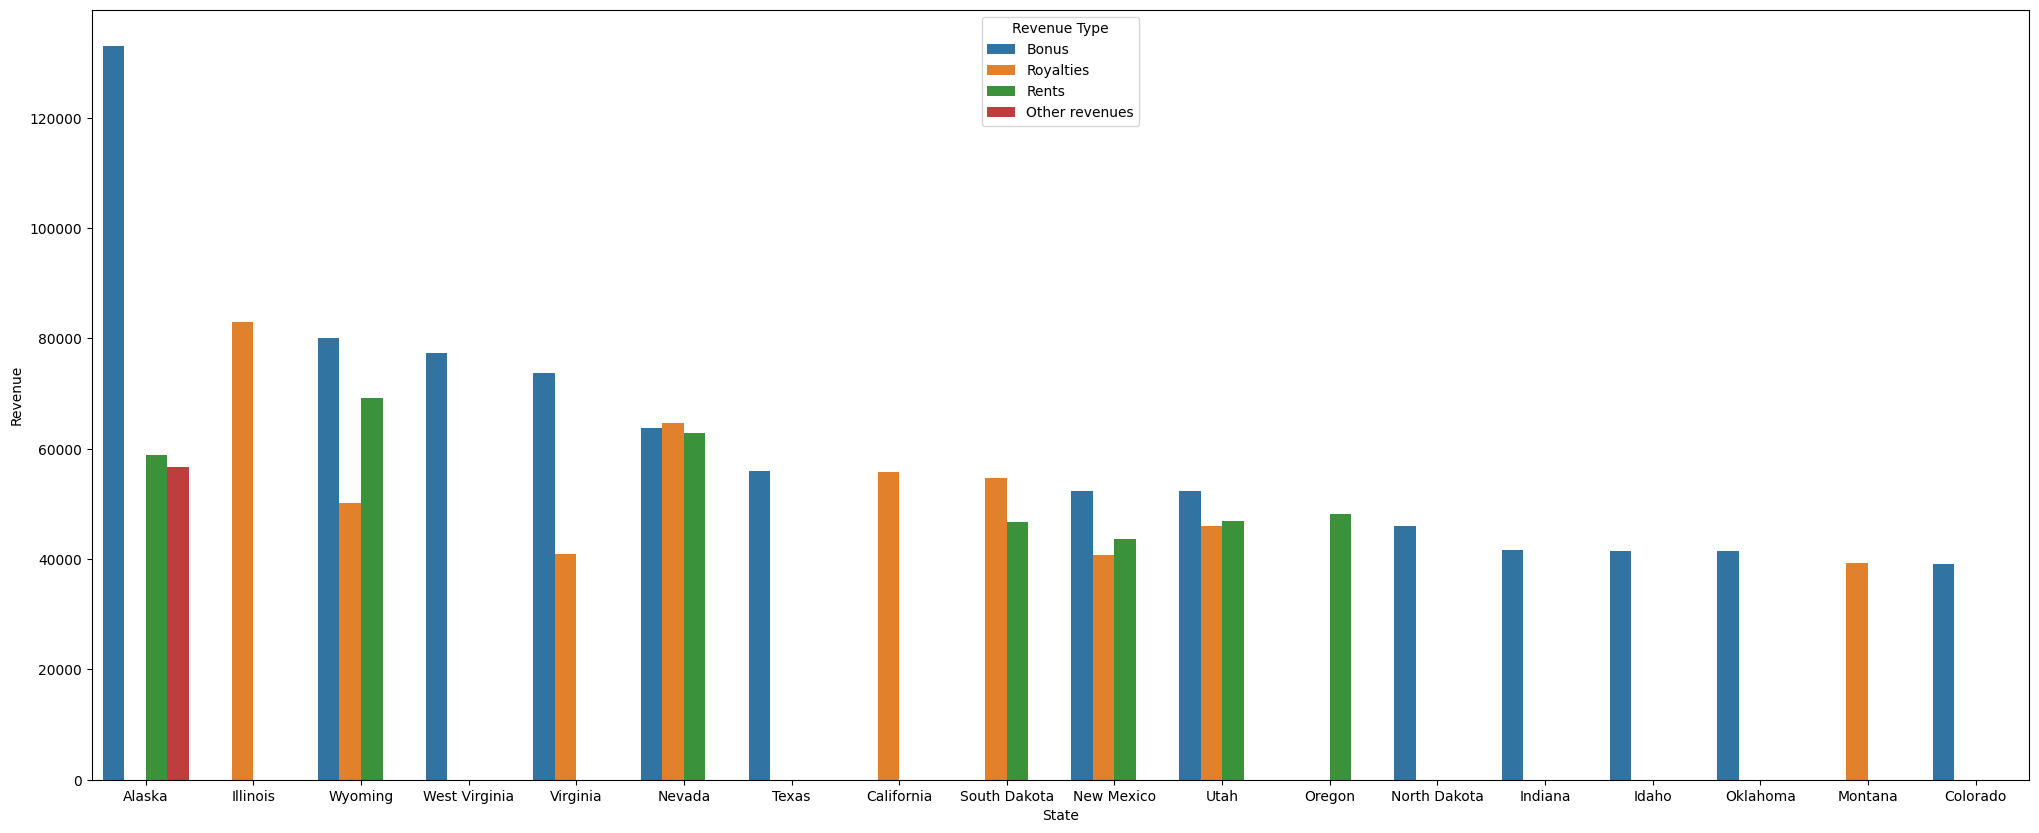

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df1=df.groupby(["State","Revenue Type"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue',ascending=False)
sns.barplot(x='State',y='Revenue',hue='Revenue Type',data=df1.head(30))

### Overall Revenue State Wise over the Years based on Mineral Lease Type ( Least Revenue Countries)

<Axes: xlabel='State', ylabel='Revenue'>

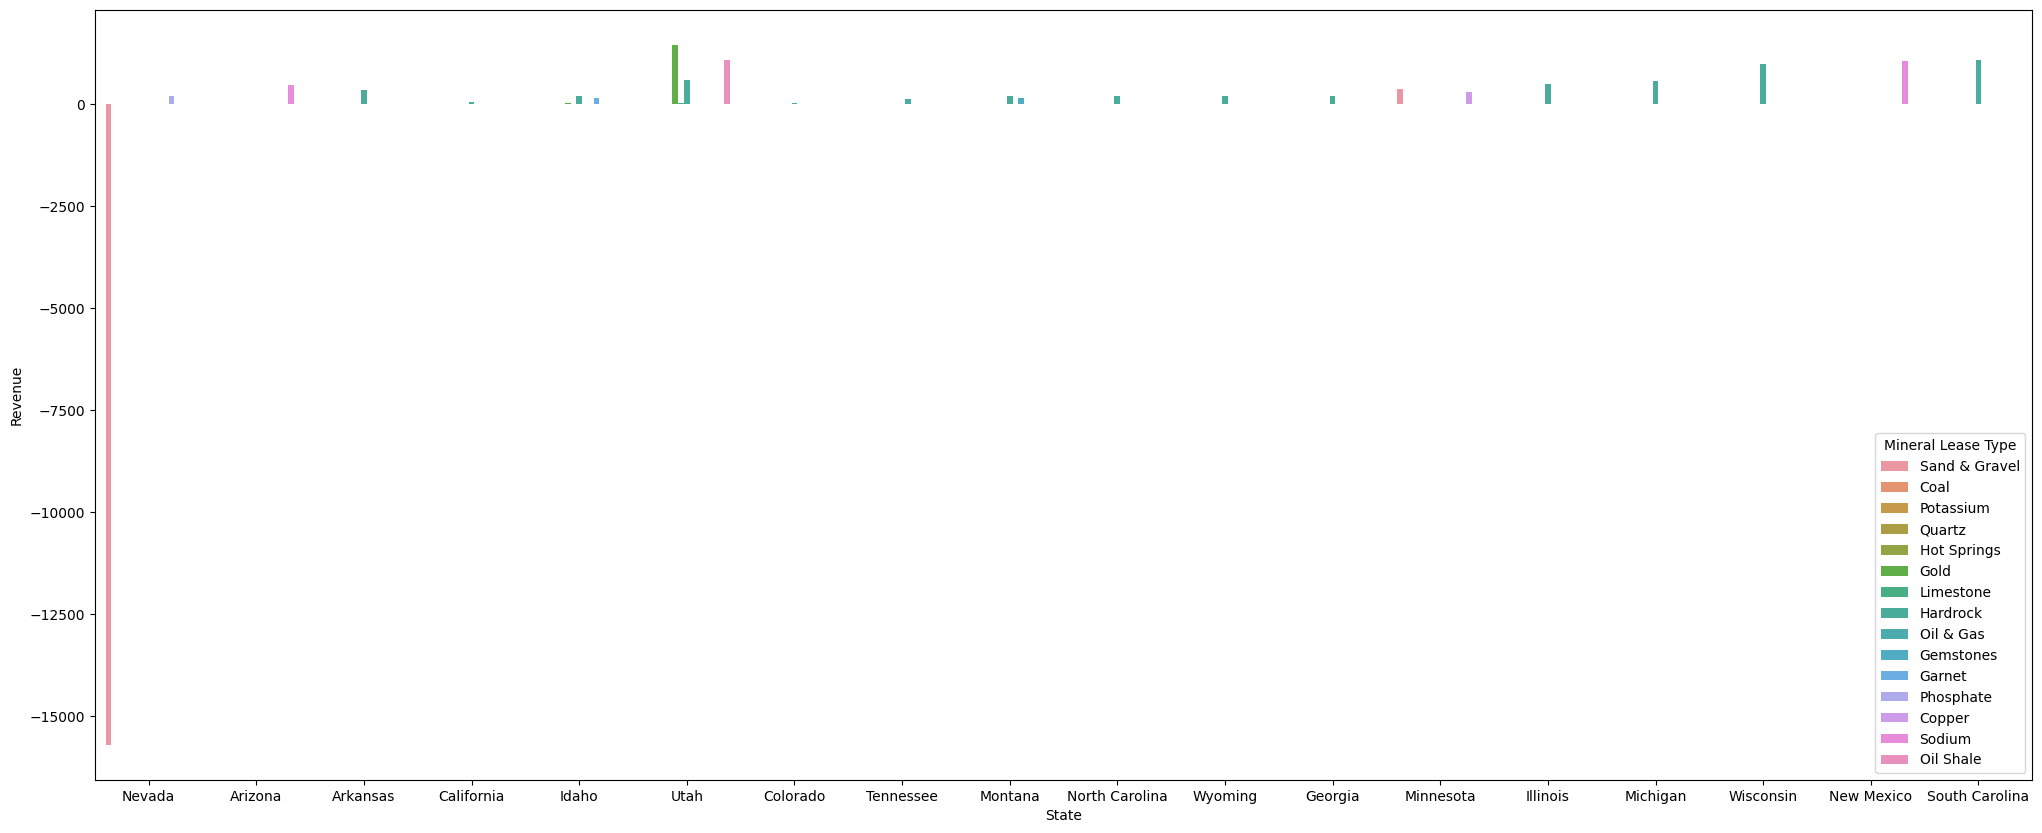

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df1=df.groupby(["State","Mineral Lease Type"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue')
sns.barplot(x='State',y='Revenue',hue='Mineral Lease Type',data=df1.head(30))

### Overall Revenue State Wise over the Years based on Mineral Lease Type ( Top Revenue Countries)


<Axes: xlabel='State', ylabel='Revenue'>

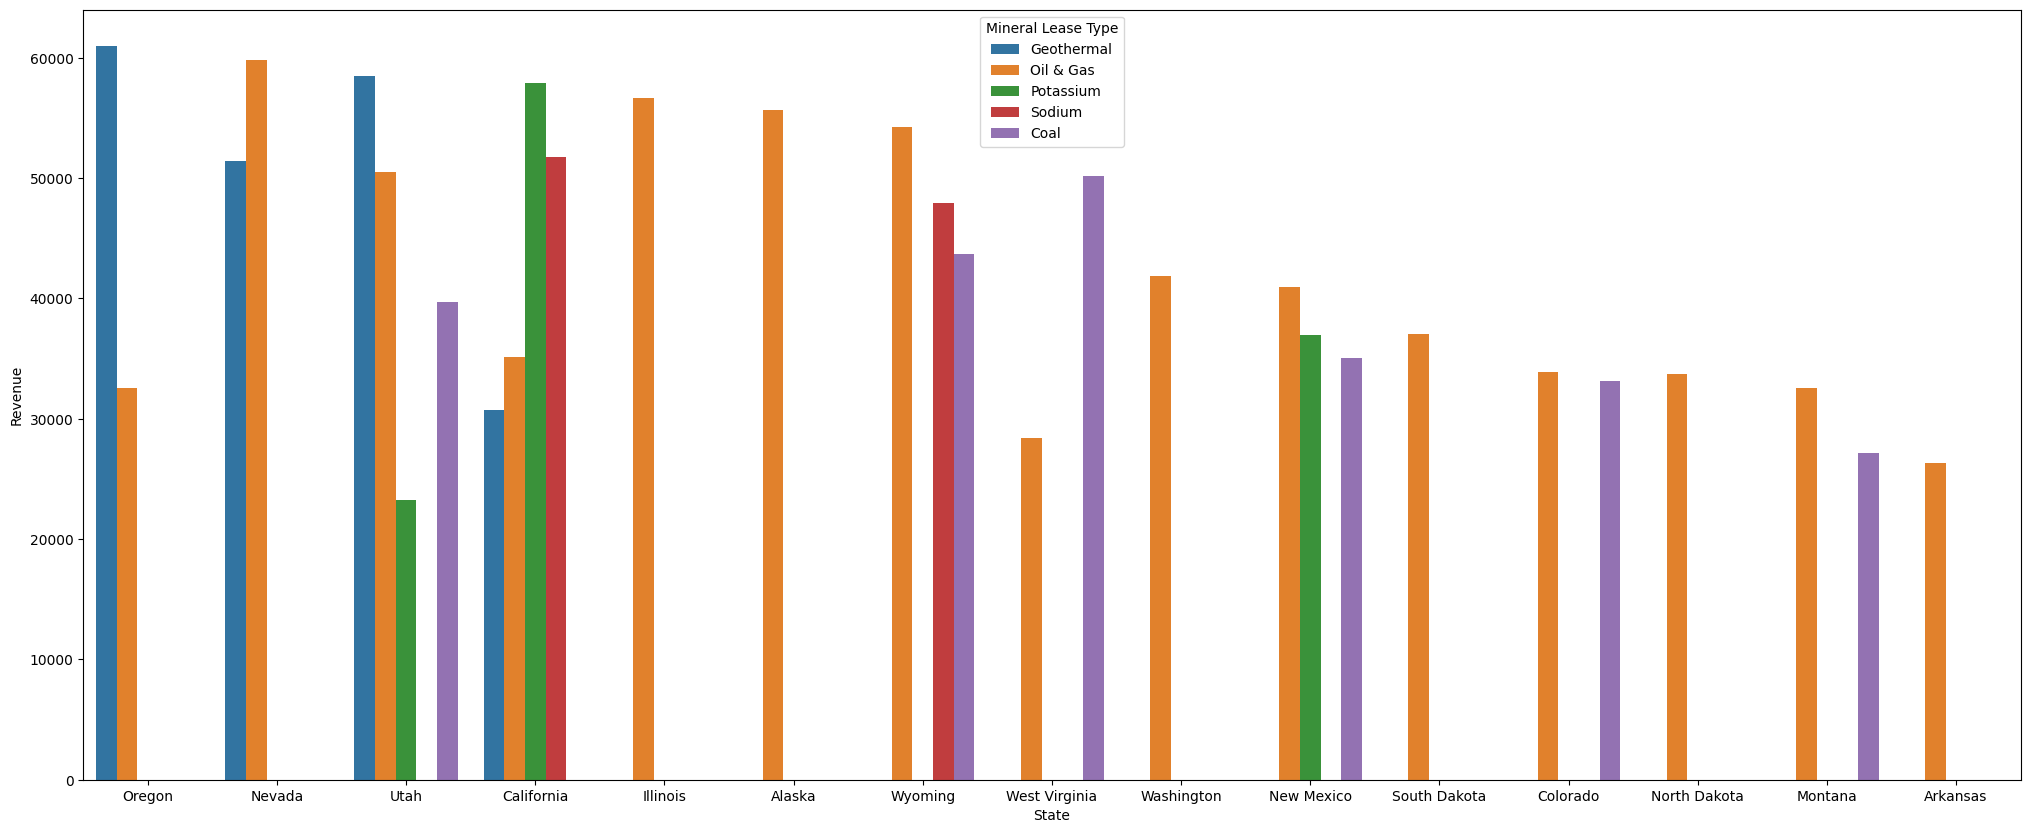

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df1=df.groupby(["State","Mineral Lease Type"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue',ascending=False)
sns.barplot(x='State',y='Revenue',hue='Mineral Lease Type',data=df1.head(30))

### Overall Revenue State Wise over the Years based on Commodity Type ( Least Revenue Countries)


<Axes: xlabel='State', ylabel='Revenue'>

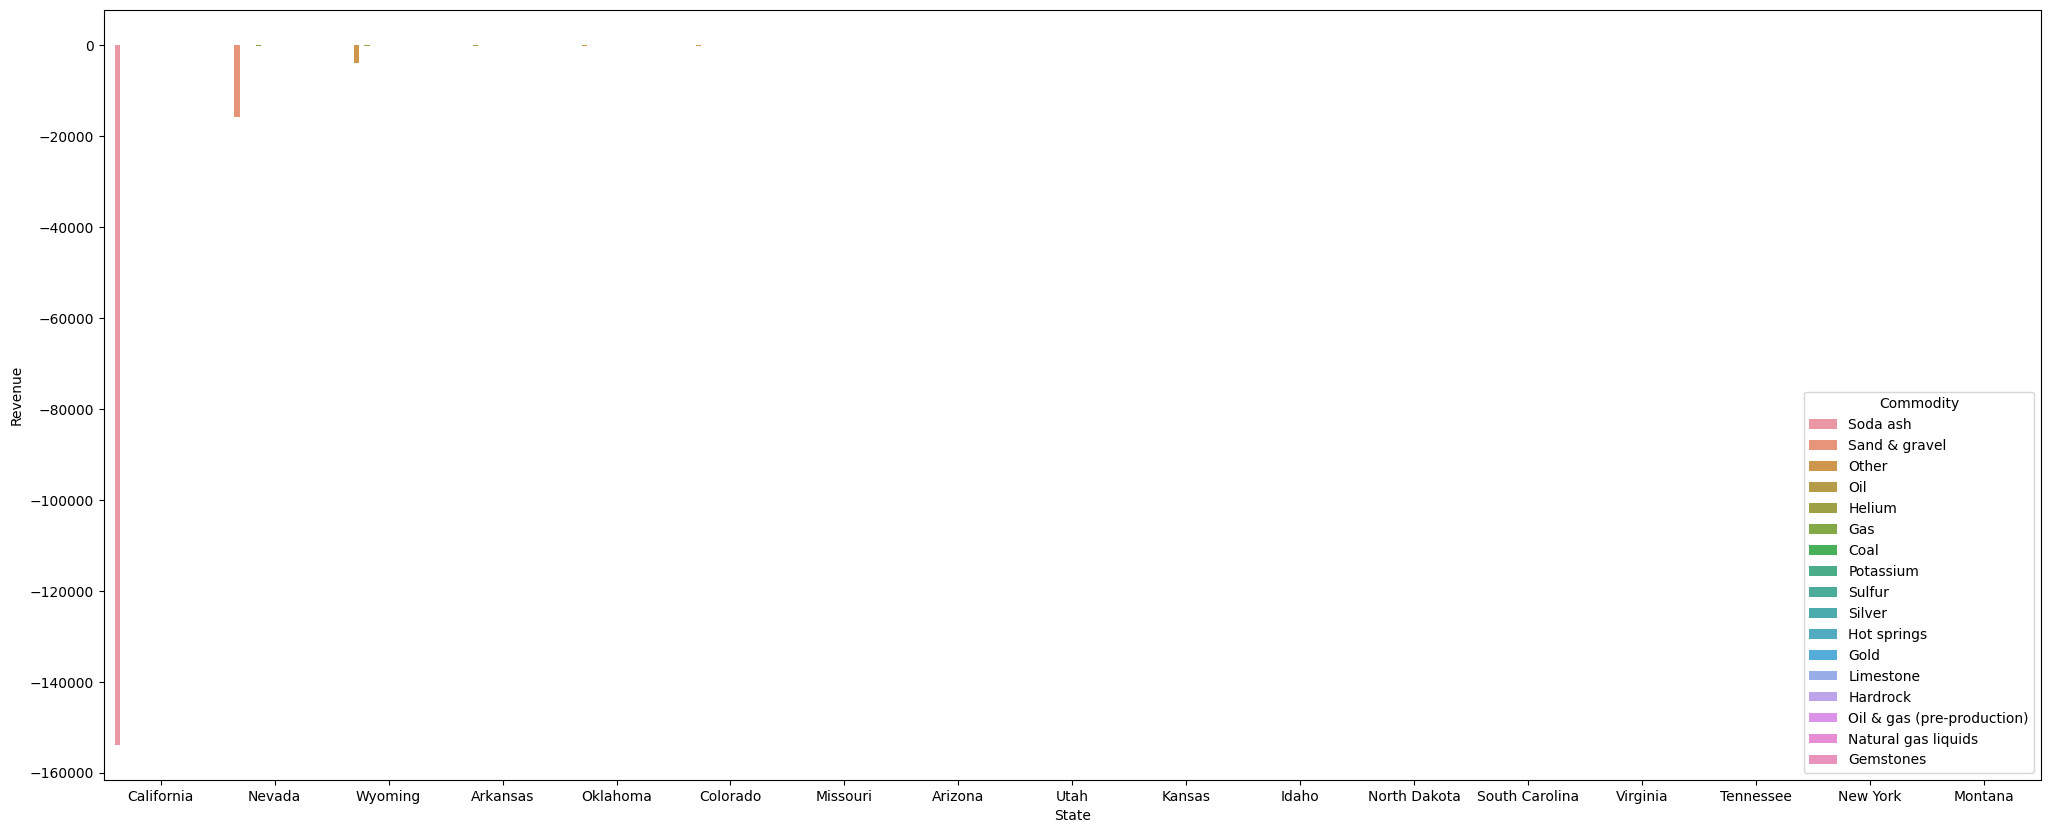

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df1=df.groupby(["State","Commodity"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue')
sns.barplot(x='State',y='Revenue',hue='Commodity',data=df1.head(30))

### Overall Revenue State Wise over the Years based on Commodity Type ( Top Revenue Countries)


<Axes: xlabel='State', ylabel='Revenue'>

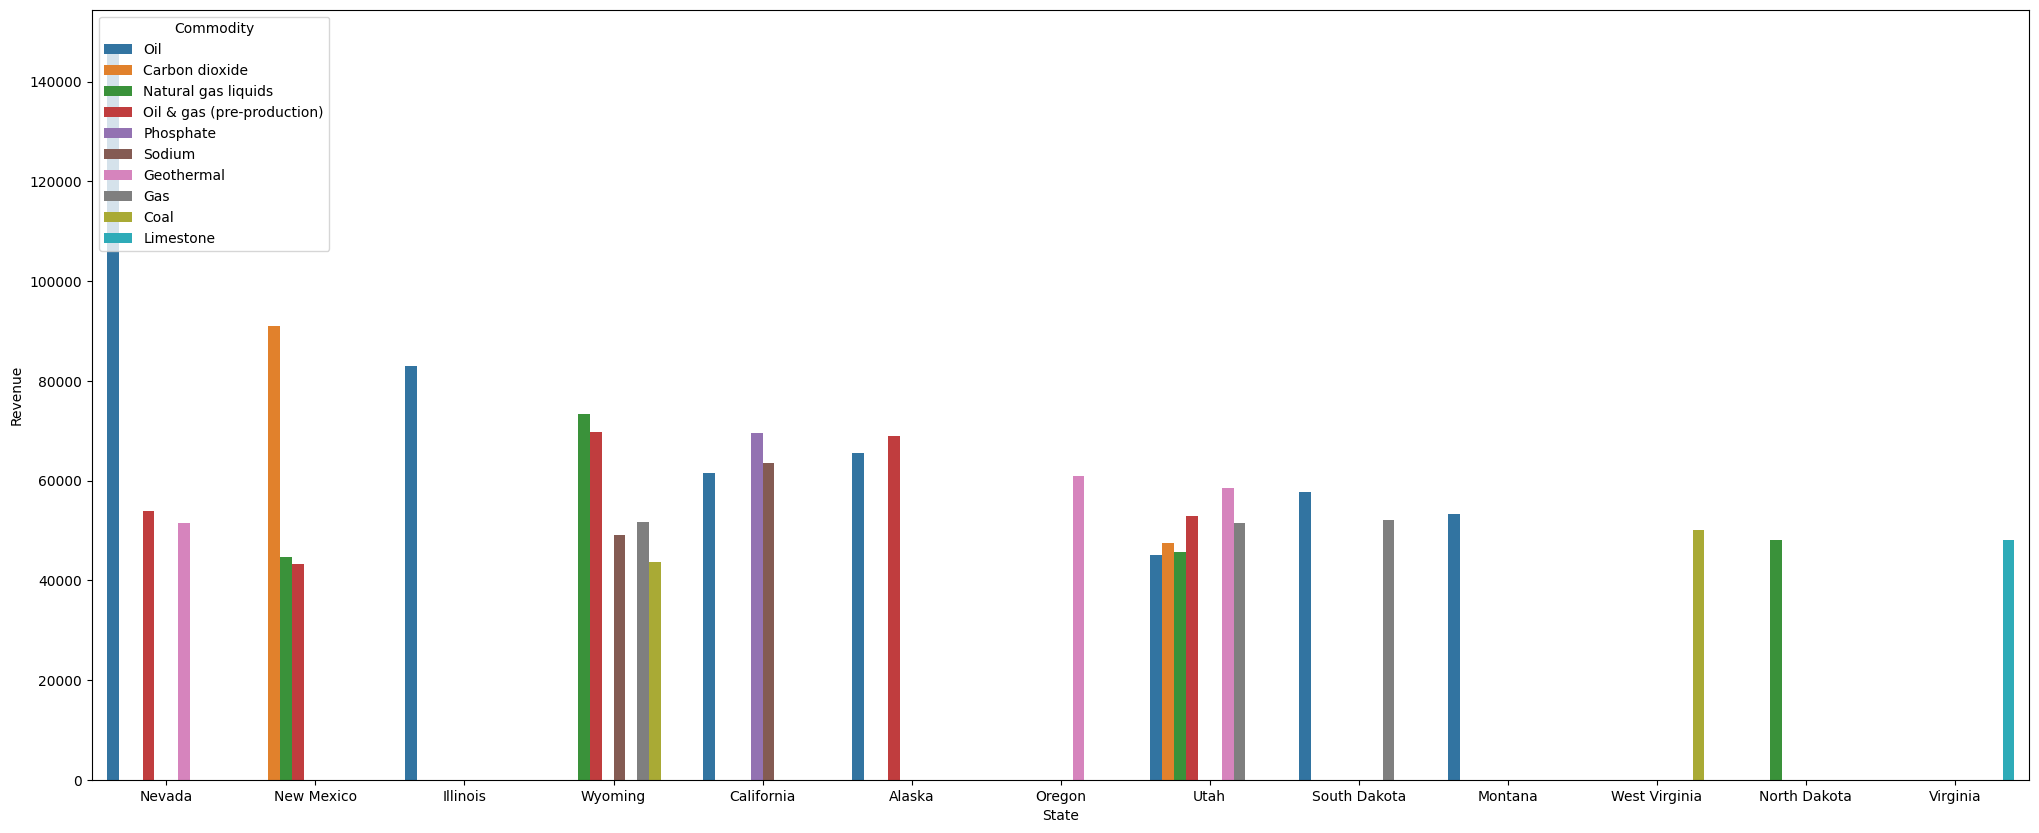

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
df1=df.groupby(["State","Commodity"]).agg({"Revenue":'mean'}).reset_index().sort_values(by='Revenue',ascending=False)
sns.barplot(x='State',y='Revenue',hue='Commodity',data=df1.head(30))

In [19]:
df2=pd.get_dummies(df)

In [20]:
df2.head()

,Calendar Year,Revenue,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Florida,State_Georgia,...,Commodity_Potassium,Commodity_Quartz,Commodity_Sand & gravel,Commodity_Silver,Commodity_Soda ash,Commodity_Sodium,Commodity_Sulfur,Commodity_Tar sands,Commodity_Wavellite,Commodity_Zinc
0,2003,341.47,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2003,331.30,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2003,57929.02,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2003,-51533.57,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2003,14834.41,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.linear_model import LinearRegression

rg = LinearRegression()
X=df2.drop(columns=["Revenue"])
Y = df2['Revenue']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [22]:
rg.fit(X_train,Y_train)

LinearRegression()

In [23]:
ypred = rg.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(Y_test,ypred)

0.07861319280139045

In [26]:
len(df2.columns)

100

In [27]:
from sklearn.decomposition import PCA

# Convert data to pandas DataFrame for convenience

# Initialize PCA with the number of components you want (e.g., 1 or 2)
scores=[]
components=[]
for i in range(99,0,-1):
    pca = PCA(n_components=i)

    # Fit and transform the data
    data_reduced = pca.fit_transform(X_train)
    data_reduced_test=pca.transform(X_test)
    rg.fit(data_reduced,Y_train)
    ypred = rg.predict(data_reduced_test)
    scores.append(r2_score(Y_test,ypred))
    components.append(i)

In [28]:
df3=pd.DataFrame()
df3['Component']=components
df3['Score']=scores
df3.sort_values(by='Score',ascending=False)

,Component,Score
25,74,7.861748e-02
24,75,7.861656e-02
14,85,7.861319e-02
30,69,7.859258e-02
26,73,7.859203e-02
...,...,...
2,97,-2.224856e+19
3,96,-2.249434e+19
1,98,-2.254015e+19
13,86,-3.259988e+19


### With 63 features, our model fits the data with 0.08 score. We will reduce the dimensionality to 63 components. And will train the data using different models

In [29]:
pca = PCA(n_components=63)

data_reduced = pca.fit_transform(X_train)
data_reduced_test=pca.transform(X_test)

## Trying Different Regression Models

In [30]:
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor()
rg.fit(X_train,Y_train)
ypred = rg.predict(X_test)
r2_score(Y_test,ypred)


0.004609808804617921

In [31]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
models = {"Random Forest Regressor":RandomForestRegressor(),
         "Decision Tree Regressor":DecisionTreeRegressor(),
         "Linear Regressor":LinearRegression(),
         "XGBoost Regression":XGBRegressor(),
         "Lasso":Lasso(alpha=1),
         "Ridge":Ridge()}

r2_scores=[]
mean_squared = []
mean_absolute = []
model_list =[]
for model_name,model in models.items():
    model.fit(data_reduced,Y_train)
    ypred = model.predict(data_reduced_test)
    r2_scores.append(r2_score(Y_test,ypred))
    mean_squared.append(mean_squared_error(Y_test,ypred))
    mean_absolute.append(mean_absolute_error(Y_test,ypred))
    model_list.append(model_name)
    
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores

accuracy_data

,Model,R2 Score
0,Random Forest Regressor,0.012609
1,Decision Tree Regressor,-0.043441
2,Linear Regressor,0.078387
3,XGBoost Regression,0.063049
4,Lasso,0.078431
5,Ridge,0.078417


In [32]:
accuracy_data

,Model,R2 Score
0,Random Forest Regressor,0.012609
1,Decision Tree Regressor,-0.043441
2,Linear Regressor,0.078387
3,XGBoost Regression,0.063049
4,Lasso,0.078431
5,Ridge,0.078417
